<div dir="rtl">

## دیباچه


این مخزن در پی انتشار آموزش نزدیک‌ترین همسایگی تهیه شد. هم به عنوان نمونه کد این الگوریتم و هم به عنوان نمونه کد کاربرد یادگیری ماشین در معامله الگوریتمی!
</br>

[آموزش نزدیک‌ترین همسایگی](https://www.youtube.com/watch?v=yl6evu-Fhs4) 

[منبع اقتباس](https://www.youtube.com/playlist?list=PLwEOixRFAUxZmM26EYI1uYtJG39HDW1zm)

</div>


<div dir="rtl">

# دریافت داده‌های بازار

شما می‌تونید داده‌ها رو مثلا از [مثلا از این سایت](https://www.dukascopy.com/swiss/english/marketwatch/historical/) دانلود و به صورت فایل آماده وارد برنامه کنید که 
ما هم از همین روش رفتیم و فایل مورد استفاده هم براتون قرار دادم.

همین طور می‌تونید با ماژول‌های پایتونی مثل یاهو فاینانس یا متاتریدر اقدام به دانلود داده کنید. 
نمونه کد این دو روش هم پایین براتون گذاشتم ولی کامنت کردم که اجرا نشن.
</div>



In [ ]:
# دریافت از متاتریدر

# # establish MetaTrader 5 connection to a specified trading account
# if not mt5.initialize(login=1234567, server="ِYour_server",password="yourpass"):
#     print("initialize() failed, error code =",mt5.last_error())

# # display data on connection status, server name and trading account
# print(mt5.version())
# # display data on MetaTrader 5 version
# print(mt5.terminal_info())

In [42]:
# timezone = pytz.timezone("Etc/UTC")
# utc_from = datetime(2021,1,10,tzinfo=timezone)
# utc_to = datetime(2021,11,10,tzinfo=timezone)
# rates_array = mt5.copy_rates_range("EURUSD", mt5.TIMEFRAME_M12, utc_from, utc_to)
# rate_df = pd.DataFrame(rates_array)
# rate_df['time'] = pd.to_datetime(rate_df['time'], unit='s')
# rate_df = rate_df.rename(columns={'time':'Gmt time', 'tick_volume':'volume'})
# rate_df.head()

,Gmt time,open,high,low,close,volume,spread,real_volume
0,2021-01-11 00:00:00,1.22178,1.22191,1.22139,1.22147,43,31,0
1,2021-01-11 00:12:00,1.22175,1.22223,1.22147,1.22181,68,18,0
2,2021-01-11 00:24:00,1.22176,1.22240,1.22155,1.22212,32,15,0
3,2021-01-11 00:36:00,1.22180,1.22229,1.22164,1.22180,63,26,0
4,2021-01-11 00:48:00,1.22170,1.22189,1.22156,1.22166,30,20,0


In [8]:
#دریافت داده‌ها از فایل آماده 
import pandas as pd
df = pd.read_csv("EURUSD_Candlestick_1_D_ASK_05.05.2003-12.02.2022.csv")
df = df.rename(columns=
               {'Open':'open', 'High':'high', 'Low':'low', 
                'Close':'close', 'Volume':'volume'})
df.tail()

,Local time,open,high,low,close,volume
6855,08.02.2022 03:30:00.000 GMT+0330,1.14414,1.14489,1.13963,1.14209,75036.5859
6856,09.02.2022 03:30:00.000 GMT+0330,1.14210,1.14480,1.14027,1.14214,63895.3555
6857,10.02.2022 03:30:00.000 GMT+0330,1.14213,1.14951,1.13750,1.14116,113935.9766
6858,11.02.2022 03:30:00.000 GMT+0330,1.14116,1.14182,1.13299,1.13507,125420.0078
6859,12.02.2022 03:30:00.000 GMT+0330,1.13507,1.13507,1.13507,1.13507,0.0000


In [10]:
# حذف سطرهای با حجم معامله صفر
indexZeros = df[ df['volume'] == 0 ].index
df.drop(indexZeros , inplace=True)
df.loc[(df["volume"] == 0 )]
df.isna().sum()

Local time    0
open          0
high          0
low           0
close         0
volume        0
dtype: int64

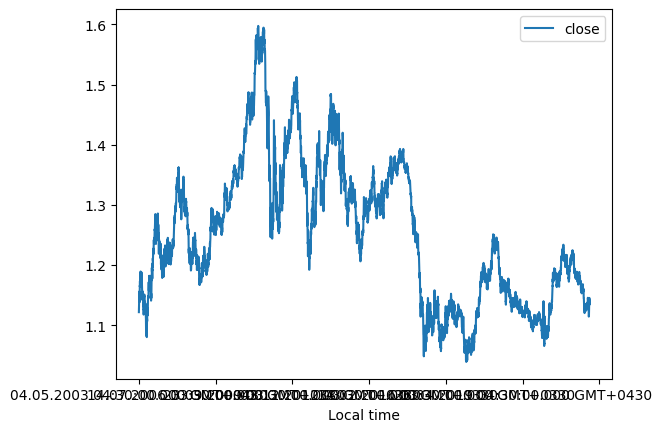

In [13]:
import matplotlib.pyplot as plt
df.plot(x='Local time',y='close')
plt.legend()
plt.show() 

<div dir="rtl">

# افزودن اندیکاتورها

از ویکی پدیا: 

تحلیل تکنیکال (به انگلیسی: Technical analysis) در امور مالی به روش تجزیه و تحلیل برای پیش‌بینی جهت تغییر قیمت‌ها از طریق مطالعهٔ داده‌های گذشته بازار به ویژه قیمت و حجم اطلاق می‌شود. تحلیل‌گران تکنیکال با استدلال آن که عرضه و تقاضا درنهایت باعث کشف قیمت می‌شود، با بررسی و مطابقت گذشتهٔ نمودار قیمت و پیدا کردن الگوهای متفاوت و تکرارشونده، قیمت آینده یک دارایی را پیش‌بینی می‌کنند.[۱] تحلیل تکنیکال اولین بار توسط چارلز داوننت در اواخر قرن ۱۹میلادی ارائه شد. تحلیل فنی بر اساس این فرض انجام می‌شود که فعالیت‌های معاملاتی گذشته می‌تواند تأثیر بسزایی در روند آیندهٔ بازار دارد یا به بیانی دیگر آینده برگرفته از رفتار گذشته میباشد. معامله‌گرانی که از تحلیل تکنیکال استفاده می‌کنند، شاخص‌ها و معیارهای مختلفی را برای بررسی روند بازار (بر اساس نمودارها و حرکات قیمت) به کار می‌گیرند.

ما در این دفترچه سعی می‌کنیم به کمک یادگیری ماشین ارتباط بین چندین شاخص (به اصطلاح اندیکاتور) مورد استفاده در تحلیل تکنیکال با روند سهم را مدلسازی کنیم. بنابراین ابتدا باید مقدار این اندیکاتورها را به داده‌ها اضافه کنیم. 
</div>



In [16]:
import numpy as np
import pandas_ta as ta
# df.ta.indicators()
# help(ta.rsi)

# افزودن ستون‌هایی برای هر اندیکاتور
df['ATR'] = df.ta.atr(length=20)
df['RSI'] = df.ta.rsi()
df['Average'] = df.ta.midprice(length=1) #midprice for each bar
df['MA40'] = df.ta.sma(length=40)
df['MA80'] = df.ta.sma(length=80)
df['MA160'] = df.ta.sma(length=160)

# تعریف تابعی برای محاسبه شیب تغییر اندیکاتورها بین چند سطر
from scipy.stats import linregress
def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope
# محاسبه شیب تغییر اندیکاتورها بین چند سطر
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
backrollingN = 6
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
df['slopeMA40'] = df['MA40'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['slopeMA80'] = df['MA80'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['slopeMA160'] = df['MA160'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['AverageSlope'] = df['Average'].rolling(window=backrollingN).apply(get_slope, raw=True)
df['RSISlope'] = df['RSI'].rolling(window=backrollingN).apply(get_slope, raw=True)

In [17]:
# df.loc[30:50,'MA40':'slopeMA40']
df.tail()

,Local time,open,high,low,close,volume,ATR,RSI,Average,MA40,MA80,MA160,slopeMA40,slopeMA80,slopeMA160,AverageSlope,RSISlope
6854,07.02.2022 03:30:00.000 GMT+0330,1.14549,1.14590,1.14154,1.14412,91005.7734,0.006310,61.777238,1.143720,1.133410,1.133287,1.151554,0.000379,-0.000199,-0.000275,0.004325,3.158767
6855,08.02.2022 03:30:00.000 GMT+0330,1.14414,1.14489,1.13963,1.14209,75036.5859,0.006258,59.149840,1.142260,1.133653,1.133102,1.151296,0.000376,-0.000168,-0.000259,0.002473,1.194149
6856,09.02.2022 03:30:00.000 GMT+0330,1.14210,1.14480,1.14027,1.14214,63895.3555,0.006171,59.195872,1.142535,1.133893,1.132894,1.151082,0.000321,-0.000171,-0.000250,0.000651,-0.840445
6857,10.02.2022 03:30:00.000 GMT+0330,1.14213,1.14951,1.13750,1.14116,113935.9766,0.006463,57.820596,1.143505,1.134113,1.132666,1.150871,0.000274,-0.000182,-0.000239,-0.000540,-1.231321
6858,11.02.2022 03:30:00.000 GMT+0330,1.14116,1.14182,1.13299,1.13507,125420.0078,0.006581,50.040330,1.137405,1.134165,1.132497,1.150630,0.000216,-0.000195,-0.000232,-0.001268,-2.265329


<div dir="rtl">

# افزودن تابعی برای محاسبه روندهای گذشته

با ایستادن در یک سطر و نگاه کردن به چند سطر جلوتر می توان گفت که آیا روند صعودی بوده یا نه!
تابع پایین تعریف شده تا برای هر سطر با توجه به چند سطر بعدیش یک روند درج بشه. 
</div>



In [20]:
# تعریف حد سود 
pipdiff = 500*1e-5
# تعریف نسبت حد سود به زیان
SLTPRatio = 2 #pipdiff/Ratio gives SL

def prevTrend(barsupfront, df1):
    length = len(df1)
    high = list(df1['high'])
    low = list(df1['low'])
    close = list(df1['close'])
    open = list(df1['open'])
    trendcat = [None] * length
    
    for line in range (0,length-barsupfront-2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1,barsupfront+2):
            value1 = open[line+1]-low[line+i]
            value2 = open[line+1]-high[line+i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)

            if ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
                trendcat[line] = 1 #-1 downtrend
                break
            elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend
            
    return trendcat
    

In [21]:
# استفاده از تابع بالا برای افزودن ستون روندهای گذشته به دیتافریم
df['mytarget'] = prevTrend(100, df)
df.head()

,Local time,open,high,low,close,volume,ATR,RSI,Average,MA40,MA80,MA160,slopeMA40,slopeMA80,slopeMA160,AverageSlope,RSISlope,mytarget,trend
0,04.05.2003 04:30:00.000 GMT+0430,1.12283,1.12354,1.12176,1.12179,2.120461e+05,NaN,NaN,1.122650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
1,05.05.2003 04:30:00.000 GMT+0430,1.12177,1.13019,1.12030,1.12934,1.050717e+06,NaN,NaN,1.125245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
2,06.05.2003 04:30:00.000 GMT+0430,1.12937,1.14510,1.12738,1.14244,1.060841e+06,NaN,NaN,1.136240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
3,07.05.2003 04:30:00.000 GMT+0430,1.14234,1.14333,1.13275,1.13504,1.057368e+06,NaN,NaN,1.138040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,08.05.2003 04:30:00.000 GMT+0430,1.13523,1.15092,1.13026,1.14830,1.059766e+06,NaN,NaN,1.140590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


# Quick analysis example

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_model= df[['volume', 'ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'slopeMA40', 'slopeMA80', 'slopeMA160', 'AverageSlope', 'RSISlope', 'mytarget']] 
df_model.hist(ax = ax)
plt.show()

# Can we use the RSI alone as a trend indicator?


In [ ]:
from matplotlib import pyplot
df_up=df.RSI[ df['mytarget'] == 2 ]
df_down=df.RSI[ df['mytarget'] == 1 ]
df_unclear=df.RSI[ df['mytarget'] == 0 ]
pyplot.hist(df_unclear, bins=100, alpha=0.5, label='unclear')
pyplot.hist(df_down, bins=100, alpha=0.5, label='down')
pyplot.hist(df_up, bins=100, alpha=0.5, label='up')

pyplot.legend(loc='upper right')
pyplot.show()

In [ ]:
df_model=df_model.dropna()

attributes=['ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'slopeMA40', 'slopeMA80', 'slopeMA160', 'AverageSlope', 'RSISlope']
X = df_model[attributes]
y = df_model["mytarget"]

print(X)

In [ ]:

#sequential sampling
train_index = int(0.8 * len(X))
X_train, X_test = X[:train_index], X[train_index:]
y_train, y_test = y[:train_index], y[train_index:]

## Fitting the KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNNModel = KNeighborsClassifier(n_neighbors=100, weights='uniform', algorithm='kd_tree', leaf_size=30, p=1, metric='minkowski', metric_params=None, n_jobs=1)
KNNModel.fit(X_train, y_train)

y_pred_train_KNN = KNNModel.predict(X_train)
y_pred_test_KNN = KNNModel.predict(X_test)

## Quick evaluation of our fitting

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train_KNN)
accuracy_test = accuracy_score(y_test, y_pred_test_KNN)
print("Accuracy train: %.2f%%" % (accuracy_train * 100.0))
print("Accuracy test: %.2f%%" % (accuracy_test * 100.0))

#------------------------------------------------------------------
#--- How should I compare my accuracy ?
print(df_model['mytarget'].value_counts()*100/df_model['mytarget'].count())

# Random Model, gambler?
pred_test = np.random.choice([0, 1, 2], len(y_pred_test))
accuracy_test = accuracy_score(y_test, pred_test)
print("Accuracy Gambler: %.2f%%" % (accuracy_test * 100.0))

## More powerful model XGBoost

In [ ]:
from xgboost import XGBClassifier
xgboostModel = XGBClassifier()
xgboostModel.fit(X_train, y_train)
pred_train_xgboost = xgboostModel.predict(X_train)
pred_test_xgboost = xgboostModel.predict(X_test)
acc_train = accuracy_score(y_train, pred_train_xgboost)
acc_test = accuracy_score(y_test, pred_test_xgboost)
#--- How should I compare my accuracy ?
print(df_model['mytarget'].value_counts()*100/df_model['mytarget'].count())

print('****Train Results****')
print("Accuracy: {:.4%}".format(acc_train))
print('****Test Results****')
print("Accuracy: {:.4%}".format(acc_test))

In [ ]:
from sklearn.metrics import accuracy_score

#sequential sampling
train_index = int(0.8 * len(X))
X_train, X_test = X[:train_index], X[train_index:]
y_train, y_test = y[:train_index], y[train_index:]
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy train: %.2f%%" % (accuracy_train * 100.0))
print("Accuracy test: %.2f%%" % (accuracy_test * 100.0))

#------------------------------------------------------------------
#--- How should I compare my accuracy ?
print(df_model['mytarget'].value_counts()*100/df_model['mytarget'].count())

# Random Model, gambler?
pred_test = np.random.choice([0, 1, 2], len(y_pred_test))
accuracy_test = accuracy_score(y_test, pred_test)
print("Accuracy Gambler: %.2f%%" % (accuracy_test * 100.0))

## Which features are most important for our model?


In [ ]:
from matplotlib import pyplot
from xgboost import plot_importance
#plot feature importance
plot_importance(model)
pyplot.show()

In [ ]:
import joblib



# save your ML model to disk
filename = 'TrendClassKNN.sav'
joblib.dump(KNNModel, filename)

filename = 'TrendClassxgboost.sav'
joblib.dump(xgboostModel, filename)

#load the model from disk
#loaded_model = joblib.load('mymodel1.sav')